## 232. 用栈实现队列

请你仅使用两个栈实现先入先出队列。队列应当支持一般队列的支持的所有操作（push、pop、peek、empty）：

实现 `MyQueue` 类：

void push(int x) 将元素 x 推到队列的末尾
int pop() 从队列的开头移除并返回元素
int peek() 返回队列开头的元素
boolean empty() 如果队列为空，返回 true ；否则，返回 false
 

**说明：**

你只能使用标准的栈操作 —— 也就是只有 push to top, peek/pop from top, size, 和 is empty 操作是合法的。
你所使用的语言也许不支持栈。你可以使用 list 或者 deque（双端队列）来模拟一个栈，只要是标准的栈操作即可。
 

**进阶：**

你能否实现每个操作均摊时间复杂度为 O(1) 的队列？换句话说，执行 n 个操作的总时间复杂度为 O(n) ，即使其中一个操作可能花费较长时间。
 

示例：
```
输入：
["MyQueue", "push", "push", "peek", "pop", "empty"]
[[], [1], [2], [], [], []]
输出：
[null, null, null, 1, 1, false]

解释：
MyQueue myQueue = new MyQueue();
myQueue.push(1); // queue is: [1]
myQueue.push(2); // queue is: [1, 2] (leftmost is front of the queue)
myQueue.peek(); // return 1
myQueue.pop(); // return 1, queue is [2]
myQueue.empty(); // return false
``` 

提示：

- 1 <= x <= 9
- 最多调用 100 次 push、pop、peek 和 empty
- 假设所有操作都是有效的 （例如，一个空的队列不会调用 pop 或者 peek 操作）


In [1]:
class MyQueue:

    def __init__(self):
        self.stack = []

    def push(self, x: int) -> None:
        """
        Push element x to the back of queue.
        """
        self.stack.append(x)

    def pop(self) -> int:
        """
        Removes the element from in front of queue and returns that element.
        """
        return self.stack.pop(0)


    def peek(self) -> int:
        """
        Get the front element.
        """
        return self.stack[0]

    def empty(self) -> bool:
        """
        Returns whether the queue is empty.
        """
        if self.stack == []:
            return True
        else:
            return False 

### 双栈
「输入栈」会把输入顺序颠倒；如果把「输入栈」的元素逐个弹出放到「输出栈」，再从「输出栈」弹出元素的时候，则可以负负得正，实现了先进先出。

In [ ]:
class MyQueue:

    def __init__(self):
        self.stack1 = []
        self.stack2 = []

    def push(self, x: int) -> None:
        self.stack1.append(x)

    def pop(self) -> int:
        if not self.stack2:
            while self.stack1:
                self.stack2.append(self.stack1.pop())
        return self.stack2.pop()


    def peek(self) -> int:
        """
        Get the front element.
        """
        if not self.stack2:
            while self.stack1:
                self.stack2.append(self.stack1.pop())
        return self.stack2[-1]

    def empty(self) -> bool:
        """
        Returns whether the queue is empty.
        """
        return not self.stack1 and not self.stack2

## 用两个栈实现队列
用两个栈实现一个队列。队列的声明如下，请实现它的两个函数 appendTail 和 deleteHead ，分别完成在队列尾部插入整数和在队列头部删除整数的功能。(若队列中没有元素，deleteHead 操作返回 -1 )

示例 1：
```
输入：
["CQueue","appendTail","deleteHead","deleteHead"]
[[],[3],[],[]]
输出：[null,null,3,-1]
```
示例 2：
```
输入：
["CQueue","deleteHead","appendTail","appendTail","deleteHead","deleteHead"]
[[],[],[5],[2],[],[]]
输出：[null,-1,null,null,5,2]
```
提示：
```
1 <= values <= 10000
最多会对 appendTail、deleteHead 进行 10000 次调用
```

栈无法实现队列功能： 栈底元素（对应队首元素）无法直接删除，需要将上方所有元素出栈。

双栈可实现列表倒序： 设有含三个元素的栈 A = [1,2,3] 和空栈 B = []。若循环执行 A 元素出栈并添加入栈 B ，直到栈 A 为空，则 A = [] , B = [3,2,1] ，即 栈 BB 元素实现栈 A 元素倒序 。

利用栈 B 删除队首元素： 倒序后，B 执行出栈则相当于删除了 A 的栈底元素，即对应队首元素。
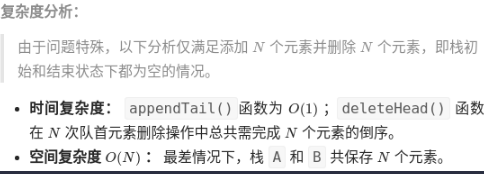

In [2]:
class CQueue:
    def __init__(self):
        self.A, self.B = [], []

    def appendTail(self, value: int) -> None:
        self.A.append(value)

    def deleteHead(self) -> int:
        if self.B: return self.B.pop()
        if not self.A: return -1
        while self.A:
            self.B.append(self.A.pop())
        return self.B.pop()